In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf #https://anaconda.org/anaconda/statsmodels
import statsmodels.api as sm #https://scikit-posthocs.readthedocs.io/en/latest/installation/
import scikit_posthocs as sp
import seaborn as sns
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt

In [2]:
AMR = pd.read_csv("/media/haley/My Book/Ecoli_results/Ecoli_ARETE_Results_Organized/04202023_ARETEEColiAMR_result_nomyco.csv")

In [5]:
AMR = AMR[["Isolate_Pathname", "Best_Hit_ARO", "Drug Class"]]

In [6]:
AMR

,Isolate_Pathname,Best_Hit_ARO,Drug Class
0,EC_0012_1H1_D,gadX,macrolide antibiotic; fluoroquinolone antibiot...
1,EC_0012_1H1_D,gadW,macrolide antibiotic; fluoroquinolone antibiot...
2,EC_0012_1H1_D,mdtF,macrolide antibiotic; fluoroquinolone antibiot...
3,EC_0012_1H1_D,mdtE,macrolide antibiotic; fluoroquinolone antibiot...
4,EC_0012_1H1_D,CRP,macrolide antibiotic; fluoroquinolone antibiot...
...,...,...,...
14007,EC_E2DI_2_E,Escherichia coli soxR with mutation conferring...,fluoroquinolone antibiotic; cephalosporin; gly...
14008,EC_E2DI_2_E,Escherichia coli soxS with mutation conferring...,fluoroquinolone antibiotic; monobactam; carbap...
14009,EC_E2DI_2_E,Escherichia coli EF-Tu mutants conferring resi...,elfamycin antibiotic
14010,EC_E2DI_2_E,cpxA,aminoglycoside antibiotic; aminocoumarin antib...


In [9]:
AMR['Source'] = AMR['Isolate_Pathname'].str.rsplit('_').str[-1]


/tmp/ipykernel_18621/3014462846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMR['Source'] = AMR['Isolate_Pathname'].str.rsplit('_').str[-1]


In [14]:
AMR.loc[AMR['Drug Class'].str.contains(';+'), 'Drug Class'] = 'Multi-drug'

In [15]:
AMR

,Isolate_Pathname,Best_Hit_ARO,Drug Class,Source
0,EC_0012_1H1_D,gadX,Multi-drug,D
1,EC_0012_1H1_D,gadW,Multi-drug,D
2,EC_0012_1H1_D,mdtF,Multi-drug,D
3,EC_0012_1H1_D,mdtE,Multi-drug,D
4,EC_0012_1H1_D,CRP,Multi-drug,D
...,...,...,...,...
14007,EC_E2DI_2_E,Escherichia coli soxR with mutation conferring...,Multi-drug,E
14008,EC_E2DI_2_E,Escherichia coli soxS with mutation conferring...,Multi-drug,E
14009,EC_E2DI_2_E,Escherichia coli EF-Tu mutants conferring resi...,elfamycin antibiotic,E
14010,EC_E2DI_2_E,cpxA,Multi-drug,E


In [18]:
unique_strings = AMR['Drug Class'].unique()
unique_strings

array(['Multi-drug', 'elfamycin antibiotic', 'peptide antibiotic',
       'fluoroquinolone antibiotic', 'aminoglycoside antibiotic',
       'tetracycline antibiotic', 'fosfomycin',
       'aminocoumarin antibiotic', 'macrolide antibiotic',
       'nitroimidazole antibiotic', 'cephalosporin', 'carbapenem',
       'diaminopyrimidine antibiotic', 'sulfonamide antibiotic',
       'disinfecting agents and antiseptics', 'glycopeptide antibiotic',
       'penam', 'cephamycin', 'phenicol antibiotic'], dtype=object)

In [23]:
replace_dict = {'E': 'Environmental', 'H': 'Cecal', 'D': 'Diseased'}
AMR['Source'] = AMR['Source'].replace(replace_dict)

/tmp/ipykernel_18621/3759339917.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMR['Source'] = AMR['Source'].replace(replace_dict)


In [24]:
AMR

,Isolate_Pathname,Best_Hit_ARO,Drug Class,Source
0,EC_0012_1H1_D,gadX,Multi-drug,Diseased
1,EC_0012_1H1_D,gadW,Multi-drug,Diseased
2,EC_0012_1H1_D,mdtF,Multi-drug,Diseased
3,EC_0012_1H1_D,mdtE,Multi-drug,Diseased
4,EC_0012_1H1_D,CRP,Multi-drug,Diseased
...,...,...,...,...
14007,EC_E2DI_2_E,Escherichia coli soxR with mutation conferring...,Multi-drug,Environmental
14008,EC_E2DI_2_E,Escherichia coli soxS with mutation conferring...,Multi-drug,Environmental
14009,EC_E2DI_2_E,Escherichia coli EF-Tu mutants conferring resi...,elfamycin antibiotic,Environmental
14010,EC_E2DI_2_E,cpxA,Multi-drug,Environmental


In [27]:
 cross_tab = pd.crosstab(AMR['Isolate_Pathname'], AMR['Drug Class'])

In [28]:
cross_tab

Drug Class,Multi-drug,aminocoumarin antibiotic,aminoglycoside antibiotic,carbapenem,cephalosporin,cephamycin,diaminopyrimidine antibiotic,disinfecting agents and antiseptics,elfamycin antibiotic,fluoroquinolone antibiotic,fosfomycin,glycopeptide antibiotic,macrolide antibiotic,nitroimidazole antibiotic,penam,peptide antibiotic,phenicol antibiotic,sulfonamide antibiotic,tetracycline antibiotic
Isolate_Pathname,,,,,,,,,,,,,,,,,,,
EC_0012_1H1_D,31,3,2,0,1,0,0,0,2,4,3,0,1,1,0,5,0,0,2
EC_0012_2H1_D,32,3,2,0,1,0,0,0,2,4,3,0,1,1,0,5,0,0,2
EC_0012_2L1_D,30,3,2,0,1,0,0,0,2,4,2,0,1,1,0,5,0,0,2
EC_0012_3S1_D,31,3,2,0,1,0,0,0,2,4,3,0,1,1,0,5,0,0,2
EC_0012_C1_H,32,3,2,0,0,0,0,0,2,4,1,0,2,1,0,5,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EC_E9DI_2_E,32,3,2,0,0,0,0,0,2,4,1,0,2,1,0,5,0,0,2
EC_E9DN_1_E,32,3,2,0,0,0,0,0,2,4,1,0,1,1,0,5,0,0,2
EC_E9DN_2_E,32,3,2,0,1,0,0,0,2,4,2,0,1,1,0,5,0,0,2


In [31]:
cross_tab['Source'] = cross_tab.index.str.rsplit('_').str[-1]

Drug Class,Multi-drug,aminocoumarin antibiotic,aminoglycoside antibiotic,carbapenem,cephalosporin,cephamycin,diaminopyrimidine antibiotic,disinfecting agents and antiseptics,elfamycin antibiotic,fluoroquinolone antibiotic,fosfomycin,glycopeptide antibiotic,macrolide antibiotic,nitroimidazole antibiotic,penam,peptide antibiotic,phenicol antibiotic,sulfonamide antibiotic,tetracycline antibiotic,Source
Isolate_Pathname,,,,,,,,,,,,,,,,,,,,
EC_0012_1H1_D,31,3,2,0,1,0,0,0,2,4,3,0,1,1,0,5,0,0,2,D
EC_0012_2H1_D,32,3,2,0,1,0,0,0,2,4,3,0,1,1,0,5,0,0,2,D
EC_0012_2L1_D,30,3,2,0,1,0,0,0,2,4,2,0,1,1,0,5,0,0,2,D
EC_0012_3S1_D,31,3,2,0,1,0,0,0,2,4,3,0,1,1,0,5,0,0,2,D
EC_0012_C1_H,32,3,2,0,0,0,0,0,2,4,1,0,2,1,0,5,0,0,2,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EC_E9DI_2_E,32,3,2,0,0,0,0,0,2,4,1,0,2,1,0,5,0,0,2,E
EC_E9DN_1_E,32,3,2,0,0,0,0,0,2,4,1,0,1,1,0,5,0,0,2,E
EC_E9DN_2_E,32,3,2,0,1,0,0,0,2,4,2,0,1,1,0,5,0,0,2,E


In [33]:
replace_dict = {'E': 'Environmental', 'H': 'Cecal', 'D': 'Diseased'}
cross_tab['Source'] = cross_tab['Source'].replace(replace_dict)

In [34]:
cross_tab

Drug Class,Multi-drug,aminocoumarin antibiotic,aminoglycoside antibiotic,carbapenem,cephalosporin,cephamycin,diaminopyrimidine antibiotic,disinfecting agents and antiseptics,elfamycin antibiotic,fluoroquinolone antibiotic,fosfomycin,glycopeptide antibiotic,macrolide antibiotic,nitroimidazole antibiotic,penam,peptide antibiotic,phenicol antibiotic,sulfonamide antibiotic,tetracycline antibiotic,Source
Isolate_Pathname,,,,,,,,,,,,,,,,,,,,
EC_0012_1H1_D,31,3,2,0,1,0,0,0,2,4,3,0,1,1,0,5,0,0,2,Diseased
EC_0012_2H1_D,32,3,2,0,1,0,0,0,2,4,3,0,1,1,0,5,0,0,2,Diseased
EC_0012_2L1_D,30,3,2,0,1,0,0,0,2,4,2,0,1,1,0,5,0,0,2,Diseased
EC_0012_3S1_D,31,3,2,0,1,0,0,0,2,4,3,0,1,1,0,5,0,0,2,Diseased
EC_0012_C1_H,32,3,2,0,0,0,0,0,2,4,1,0,2,1,0,5,0,0,2,Cecal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EC_E9DI_2_E,32,3,2,0,0,0,0,0,2,4,1,0,2,1,0,5,0,0,2,Environmental
EC_E9DN_1_E,32,3,2,0,0,0,0,0,2,4,1,0,1,1,0,5,0,0,2,Environmental
EC_E9DN_2_E,32,3,2,0,1,0,0,0,2,4,2,0,1,1,0,5,0,0,2,Environmental


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Diseased vs. Cecal: t-test independent samples, P_val:4.249e-01 t=-8.001e-01
Cecal vs. Environmental: t-test independent samples, P_val:3.466e-02 t=-2.131e+00
Diseased vs. Environmental: t-test independent samples, P_val:1.870e-03 t=-3.156e+00


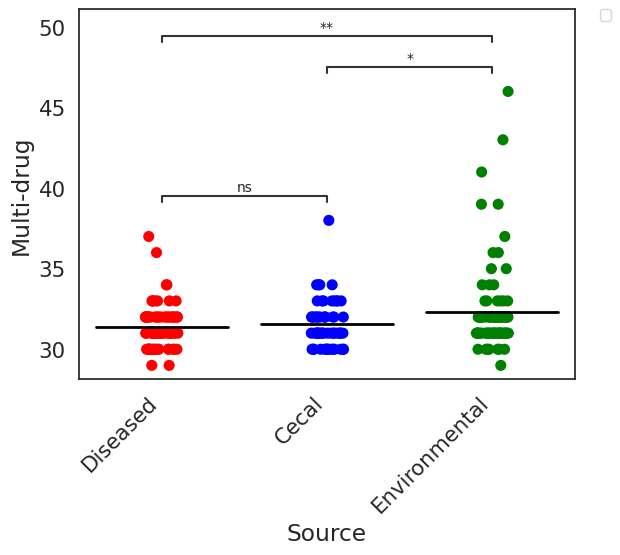

In [37]:
pairs = []

pairs2=[('Diseased', 'Cecal'), ('Diseased','Environmental'), ("Cecal","Environmental")]
states_subcat =['Diseased', 'Cecal', 'Environmental']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': cross_tab, 'x': 'Source', 'y': 'Multi-drug', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Source", y="Multi-drug", data=cross_tab, size=8, order=states_subcat, palette=['red','blue', 'green'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Source",
            y="Multi-drug",
            data=cross_tab,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("05012023_EcoliARETE_multidrug_source.png", dpi = 400, bbox_inches= "tight")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Diseased vs. Cecal: t-test independent samples, P_val:1.293e-01 t=1.525e+00
Cecal vs. Environmental: t-test independent samples, P_val:5.932e-01 t=-5.354e-01
Diseased vs. Environmental: t-test independent samples, P_val:3.793e-01 t=8.814e-01


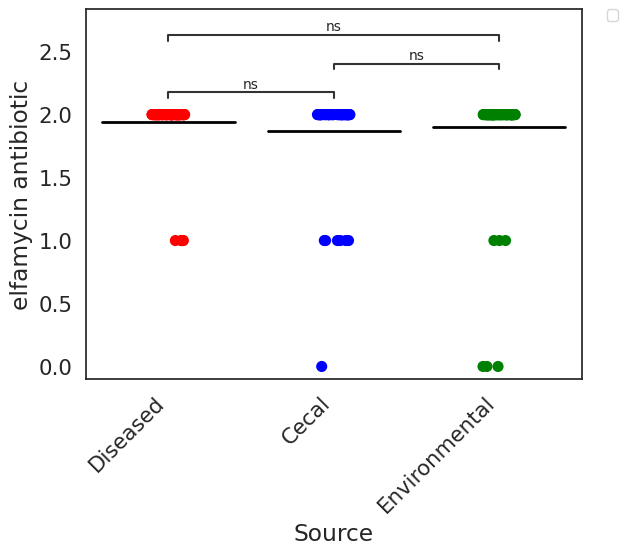

In [39]:
pairs = []

pairs2=[('Diseased', 'Cecal'), ('Diseased','Environmental'), ("Cecal","Environmental")]
states_subcat =['Diseased', 'Cecal', 'Environmental']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': cross_tab, 'x': 'Source', 'y': 'elfamycin antibiotic', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Source", y="elfamycin antibiotic", data=cross_tab, size=8, order=states_subcat, palette=['red','blue', 'green'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Source",
            y="elfamycin antibiotic",
            data=cross_tab,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("05012023_EcoliARETE_elfamycin_antibiotic_source.png", dpi = 400, bbox_inches= "tight")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Diseased vs. Cecal: t-test independent samples, P_val:2.452e-01 t=-1.167e+00
Cecal vs. Environmental: t-test independent samples, P_val:6.919e-01 t=3.970e-01
Diseased vs. Environmental: t-test independent samples, P_val:2.099e-01 t=-1.258e+00


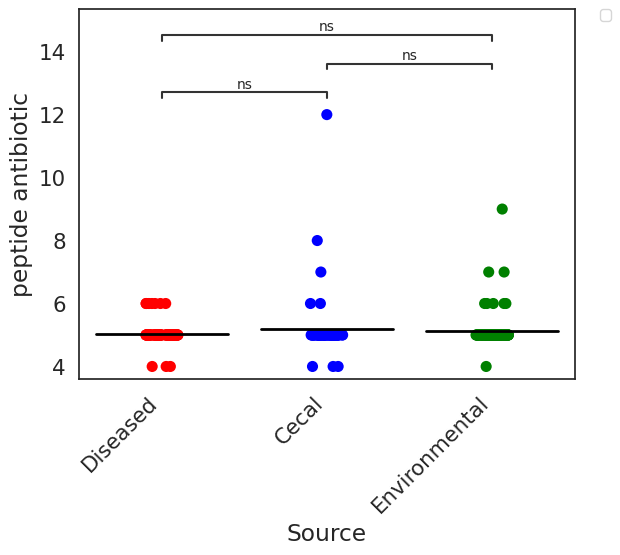

In [40]:
pairs = []

pairs2=[('Diseased', 'Cecal'), ('Diseased','Environmental'), ("Cecal","Environmental")]
states_subcat =['Diseased', 'Cecal', 'Environmental']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': cross_tab, 'x': 'Source', 'y': 'peptide antibiotic', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Source", y="peptide antibiotic", data=cross_tab, size=8, order=states_subcat, palette=['red','blue', 'green'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Source",
            y="peptide antibiotic",
            data=cross_tab,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("05012023_EcoliARETE_peptide_antibiotic_source.png", dpi = 400, bbox_inches= "tight")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Diseased vs. Cecal: t-test independent samples, P_val:1.081e-01 t=-1.616e+00
Cecal vs. Environmental: t-test independent samples, P_val:5.658e-01 t=-5.755e-01
Diseased vs. Environmental: t-test independent samples, P_val:6.577e-02 t=-1.851e+00


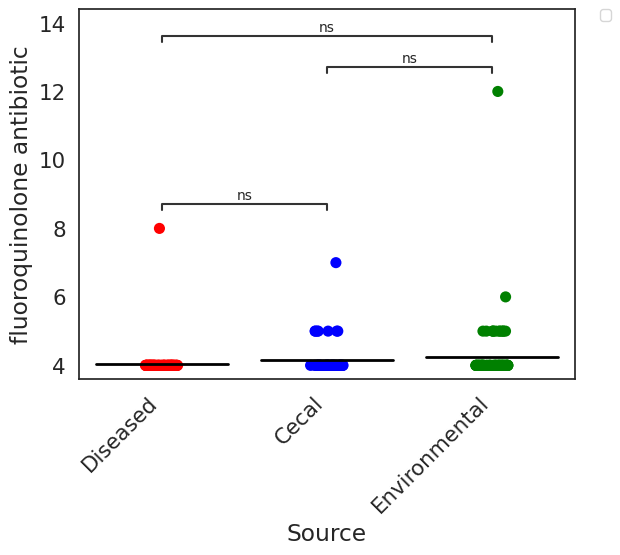

In [41]:
pairs = []

pairs2=[('Diseased', 'Cecal'), ('Diseased','Environmental'), ("Cecal","Environmental")]
states_subcat =['Diseased', 'Cecal', 'Environmental']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': cross_tab, 'x': 'Source', 'y': 'fluoroquinolone antibiotic', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Source", y="fluoroquinolone antibiotic", data=cross_tab, size=8, order=states_subcat, palette=['red','blue', 'green'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Source",
            y="fluoroquinolone antibiotic",
            data=cross_tab,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("05012023_EcoliARETE_fluoroquinolone_antibiotic_source.png", dpi = 400, bbox_inches= "tight")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Diseased vs. Cecal: t-test independent samples, P_val:6.737e-02 t=1.843e+00
Cecal vs. Environmental: t-test independent samples, P_val:4.063e-01 t=-8.328e-01
Diseased vs. Environmental: t-test independent samples, P_val:3.423e-01 t=9.522e-01


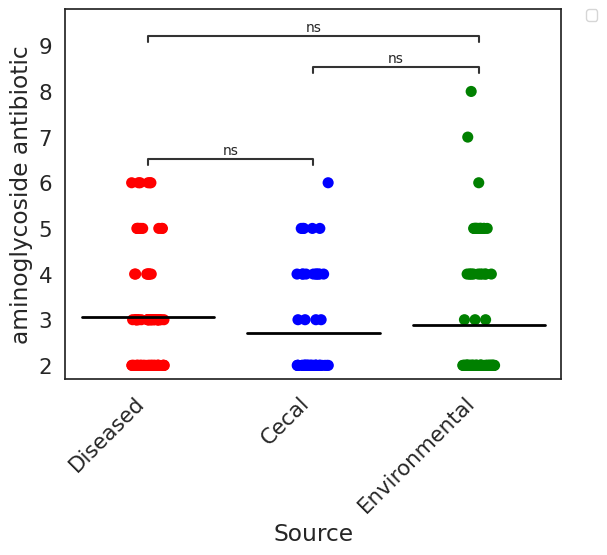

In [43]:
pairs = []

pairs2=[('Diseased', 'Cecal'), ('Diseased','Environmental'), ("Cecal","Environmental")]
states_subcat =['Diseased', 'Cecal', 'Environmental']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': cross_tab, 'x': 'Source', 'y': 'aminoglycoside antibiotic', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Source", y="aminoglycoside antibiotic", data=cross_tab, size=8, order=states_subcat, palette=['red','blue', 'green'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Source",
            y="aminoglycoside antibiotic",
            data=cross_tab,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("05012023_EcoliARETE_aminoglycoside_antibiotic_source.png", dpi = 400, bbox_inches= "tight")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Diseased vs. Cecal: t-test independent samples, P_val:8.372e-02 t=1.741e+00
Cecal vs. Environmental: t-test independent samples, P_val:2.269e-03 t=-3.105e+00
Diseased vs. Environmental: t-test independent samples, P_val:4.077e-02 t=-2.060e+00


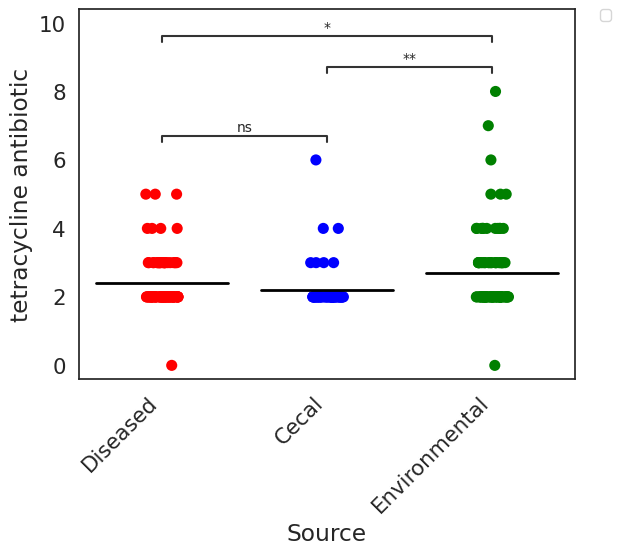

In [44]:
pairs = []

pairs2=[('Diseased', 'Cecal'), ('Diseased','Environmental'), ("Cecal","Environmental")]
states_subcat =['Diseased', 'Cecal', 'Environmental']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': cross_tab, 'x': 'Source', 'y': 'tetracycline antibiotic', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Source", y="tetracycline antibiotic", data=cross_tab, size=8, order=states_subcat, palette=['red','blue', 'green'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Source",
            y="tetracycline antibiotic",
            data=cross_tab,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("05012023_EcoliARETE_tetracycline_antibiotic_source.png", dpi = 400, bbox_inches= "tight")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Diseased vs. Cecal: t-test independent samples, P_val:8.930e-12 t=7.402e+00
Cecal vs. Environmental: t-test independent samples, P_val:4.309e-04 t=-3.599e+00
Diseased vs. Environmental: t-test independent samples, P_val:6.319e-02 t=1.869e+00


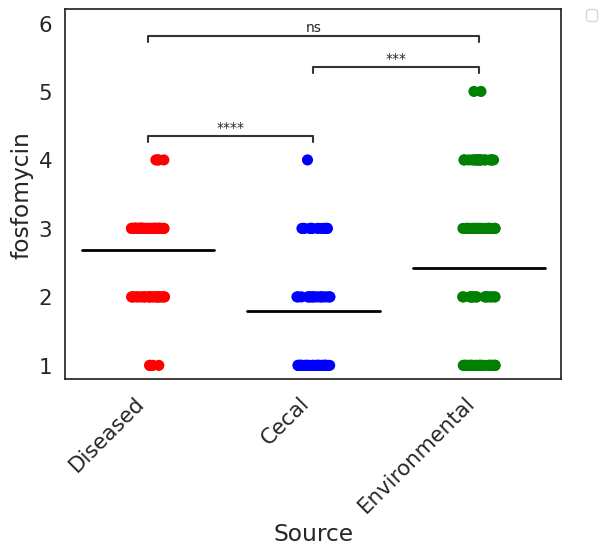

In [45]:
pairs = []

pairs2=[('Diseased', 'Cecal'), ('Diseased','Environmental'), ("Cecal","Environmental")]
states_subcat =['Diseased', 'Cecal', 'Environmental']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': cross_tab, 'x': 'Source', 'y': 'fosfomycin', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Source", y="fosfomycin", data=cross_tab, size=8, order=states_subcat, palette=['red','blue', 'green'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Source",
            y="fosfomycin",
            data=cross_tab,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("05012023_EcoliARETE_fosfomycin_source.png", dpi = 400, bbox_inches= "tight")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Diseased vs. Cecal: t-test independent samples, P_val:5.281e-02 t=-1.952e+00
Cecal vs. Environmental: t-test independent samples, P_val:4.131e-02 t=2.058e+00
Diseased vs. Environmental: t-test independent samples, P_val:7.516e-01 t=3.170e-01


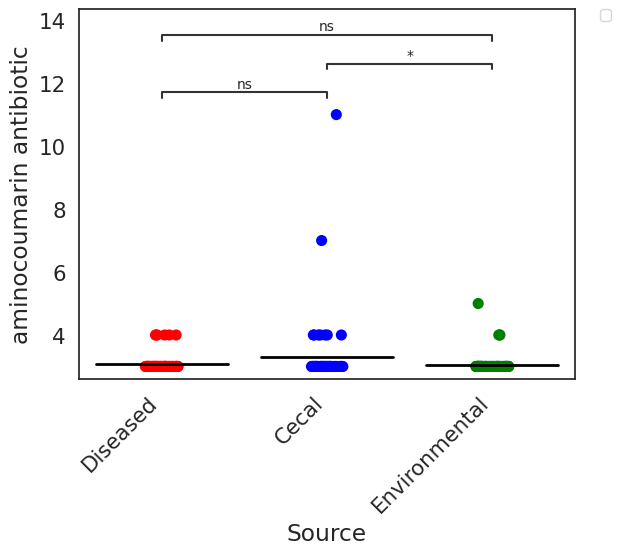

In [46]:
pairs = []

pairs2=[('Diseased', 'Cecal'), ('Diseased','Environmental'), ("Cecal","Environmental")]
states_subcat =['Diseased', 'Cecal', 'Environmental']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': cross_tab, 'x': 'Source', 'y': 'aminocoumarin antibiotic', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Source", y="aminocoumarin antibiotic", data=cross_tab, size=8, order=states_subcat, palette=['red','blue', 'green'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Source",
            y="aminocoumarin antibiotic",
            data=cross_tab,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("05012023_EcoliARETE_aminocoumarin_antibiotic_source.png", dpi = 400, bbox_inches= "tight")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Diseased vs. Cecal: t-test independent samples, P_val:9.454e-02 t=-1.683e+00
Cecal vs. Environmental: t-test independent samples, P_val:2.412e-01 t=1.177e+00
Diseased vs. Environmental: t-test independent samples, P_val:8.404e-01 t=-2.016e-01


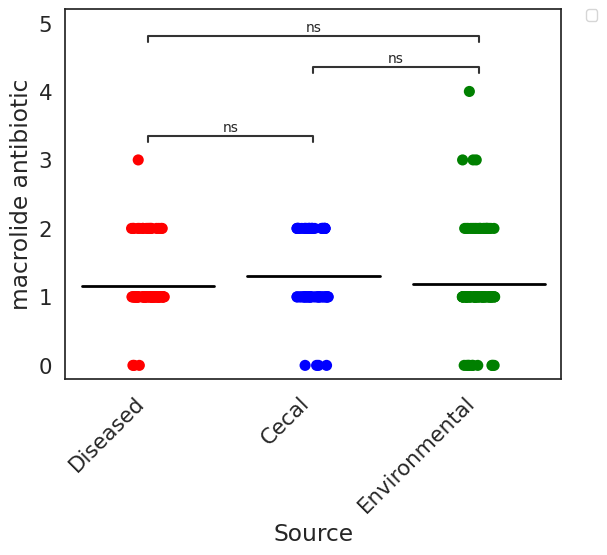

In [47]:
pairs = []

pairs2=[('Diseased', 'Cecal'), ('Diseased','Environmental'), ("Cecal","Environmental")]
states_subcat =['Diseased', 'Cecal', 'Environmental']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': cross_tab, 'x': 'Source', 'y': 'macrolide antibiotic', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Source", y="macrolide antibiotic", data=cross_tab, size=8, order=states_subcat, palette=['red','blue', 'green'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Source",
            y="macrolide antibiotic",
            data=cross_tab,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("05012023_EcoliARETE_macrolide_antibiotic_source.png", dpi = 400, bbox_inches= "tight")

/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statannotations/stats/StatTest.py:77: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, pval = self._func(group_data1, group_data2, *self.args,


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Diseased vs. Cecal: t-test independent samples, P_val:nan t=nan
Cecal vs. Environmental: t-test independent samples, P_val:2.518e-01 t=-1.150e+00
Diseased vs. Environmental: t-test independent samples, P_val:1.613e-01 t=-1.407e+00


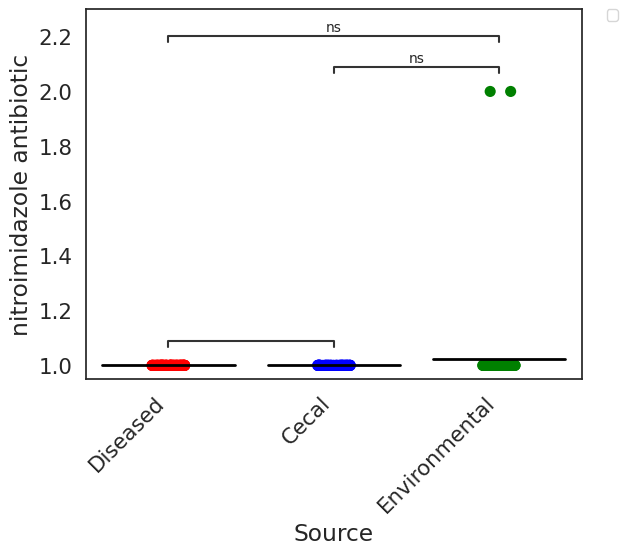

In [48]:
pairs = []

pairs2=[('Diseased', 'Cecal'), ('Diseased','Environmental'), ("Cecal","Environmental")]
states_subcat =['Diseased', 'Cecal', 'Environmental']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': cross_tab, 'x': 'Source', 'y': 'nitroimidazole antibiotic', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Source", y="nitroimidazole antibiotic", data=cross_tab, size=8, order=states_subcat, palette=['red','blue', 'green'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Source",
            y="nitroimidazole antibiotic",
            data=cross_tab,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("05012023_EcoliARETE_nitroimidazole_antibiotic_source.png", dpi = 400, bbox_inches= "tight")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Diseased vs. Cecal: t-test independent samples, P_val:4.805e-04 t=3.570e+00
Cecal vs. Environmental: t-test independent samples, P_val:7.930e-01 t=-2.629e-01
Diseased vs. Environmental: t-test independent samples, P_val:1.710e-04 t=3.838e+00


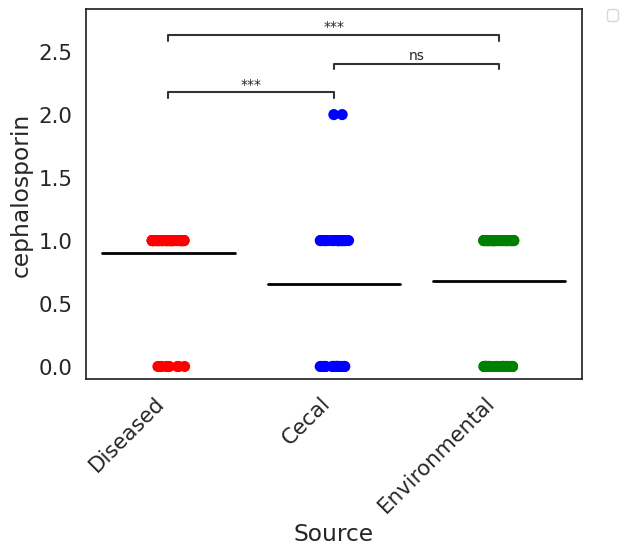

In [49]:
pairs = []

pairs2=[('Diseased', 'Cecal'), ('Diseased','Environmental'), ("Cecal","Environmental")]
states_subcat =['Diseased', 'Cecal', 'Environmental']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': cross_tab, 'x': 'Source', 'y': 'cephalosporin', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Source", y="cephalosporin", data=cross_tab, size=8, order=states_subcat, palette=['red','blue', 'green'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Source",
            y="cephalosporin",
            data=cross_tab,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("05012023_EcoliARETE_cephalosporin_source.png", dpi = 400, bbox_inches= "tight")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Diseased vs. Cecal: t-test independent samples, P_val:8.308e-02 t=-1.745e+00
Cecal vs. Environmental: t-test independent samples, P_val:3.364e-01 t=9.643e-01
Diseased vs. Environmental: t-test independent samples, P_val:3.239e-01 t=-9.891e-01


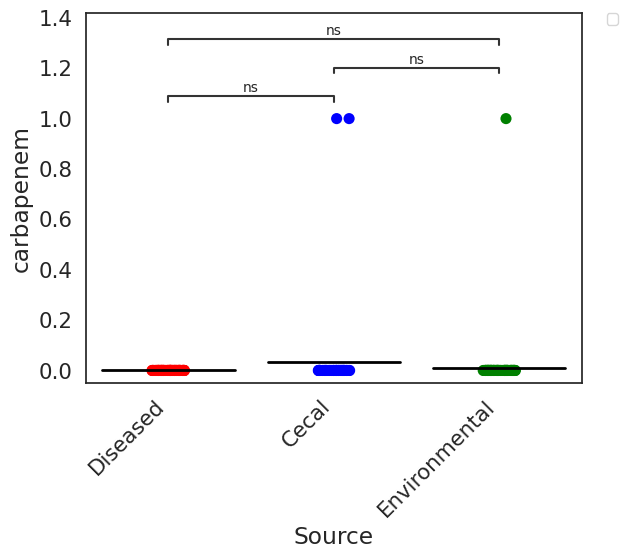

In [50]:
pairs = []

pairs2=[('Diseased', 'Cecal'), ('Diseased','Environmental'), ("Cecal","Environmental")]
states_subcat =['Diseased', 'Cecal', 'Environmental']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': cross_tab, 'x': 'Source', 'y': 'carbapenem', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Source", y="carbapenem", data=cross_tab, size=8, order=states_subcat, palette=['red','blue', 'green'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Source",
            y="carbapenem",
            data=cross_tab,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("05012023_EcoliARETE_carbapenem_source.png", dpi = 400, bbox_inches= "tight")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Diseased vs. Cecal: t-test independent samples, P_val:4.099e-02 t=2.061e+00
Cecal vs. Environmental: t-test independent samples, P_val:1.209e-02 t=-2.540e+00
Diseased vs. Environmental: t-test independent samples, P_val:4.474e-01 t=-7.614e-01


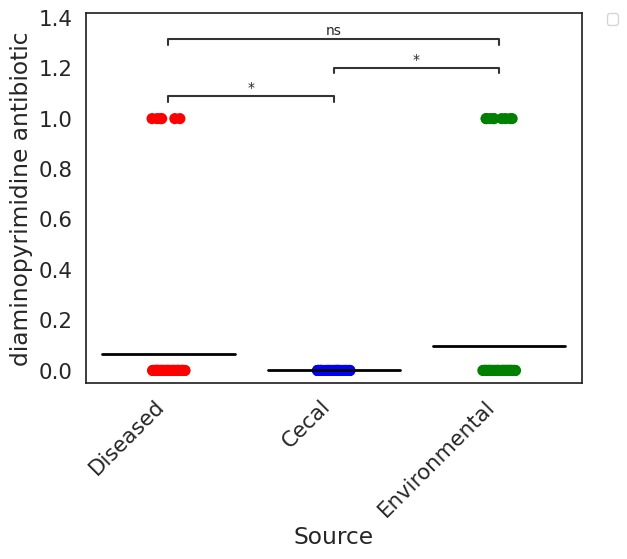

In [51]:
pairs = []

pairs2=[('Diseased', 'Cecal'), ('Diseased','Environmental'), ("Cecal","Environmental")]
states_subcat =['Diseased', 'Cecal', 'Environmental']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': cross_tab, 'x': 'Source', 'y': 'diaminopyrimidine antibiotic', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Source", y="diaminopyrimidine antibiotic", data=cross_tab, size=8, order=states_subcat, palette=['red','blue', 'green'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Source",
            y="diaminopyrimidine antibiotic",
            data=cross_tab,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("05012023_EcoliARETE_diaminopyrimidine_antibiotic_source.png", dpi = 400, bbox_inches= "tight")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Diseased vs. Cecal: t-test independent samples, P_val:3.483e-02 t=2.130e+00
Cecal vs. Environmental: t-test independent samples, P_val:8.405e-02 t=-1.739e+00
Diseased vs. Environmental: t-test independent samples, P_val:7.066e-01 t=3.770e-01


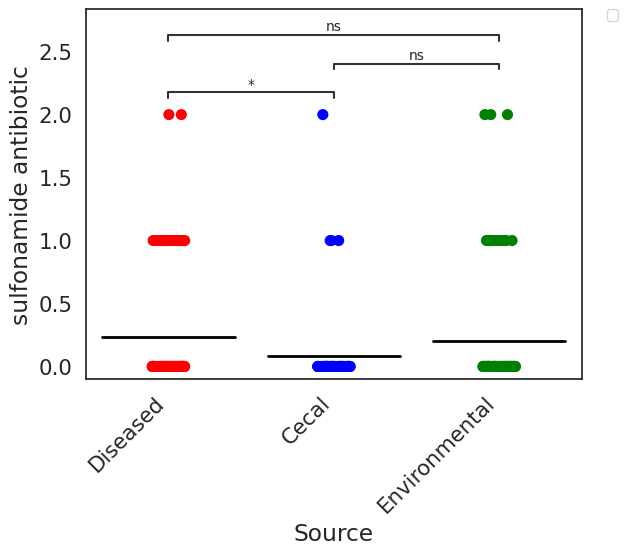

In [52]:
pairs = []

pairs2=[('Diseased', 'Cecal'), ('Diseased','Environmental'), ("Cecal","Environmental")]
states_subcat =['Diseased', 'Cecal', 'Environmental']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': cross_tab, 'x': 'Source', 'y': 'sulfonamide antibiotic', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Source", y="sulfonamide antibiotic", data=cross_tab, size=8, order=states_subcat, palette=['red','blue', 'green'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Source",
            y="sulfonamide antibiotic",
            data=cross_tab,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("05012023_EcoliARETE_sulfonamide_antibiotic_source.png", dpi = 400, bbox_inches= "tight")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Diseased vs. Cecal: t-test independent samples, P_val:3.272e-03 t=2.989e+00
Cecal vs. Environmental: t-test independent samples, P_val:2.866e-03 t=-3.031e+00
Diseased vs. Environmental: t-test independent samples, P_val:7.582e-01 t=-3.082e-01


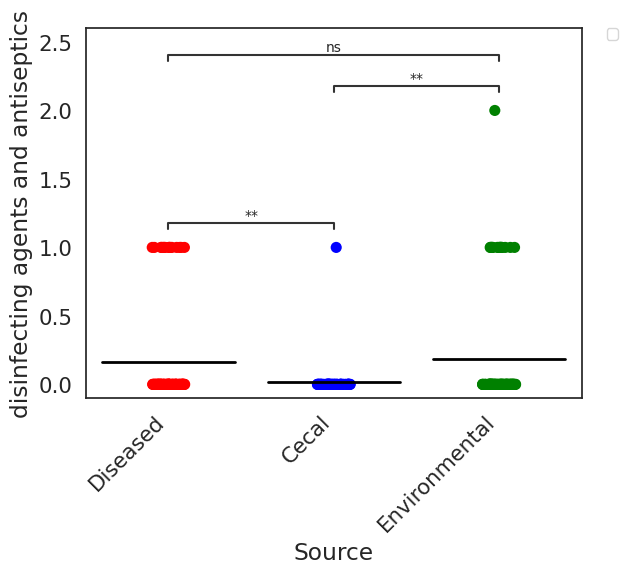

In [53]:
pairs = []

pairs2=[('Diseased', 'Cecal'), ('Diseased','Environmental'), ("Cecal","Environmental")]
states_subcat =['Diseased', 'Cecal', 'Environmental']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': cross_tab, 'x': 'Source', 'y': 'disinfecting agents and antiseptics', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Source", y="disinfecting agents and antiseptics", data=cross_tab, size=8, order=states_subcat, palette=['red','blue', 'green'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Source",
            y="disinfecting agents and antiseptics",
            data=cross_tab,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("05012023_EcoliARETE_disinfecting_agents_and_antiseptics_source.png", dpi = 400, bbox_inches= "tight")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Diseased vs. Cecal: t-test independent samples, P_val:2.231e-01 t=-1.223e+00
Cecal vs. Environmental: t-test independent samples, P_val:2.180e-01 t=1.237e+00
Diseased vs. Environmental: t-test independent samples, P_val:nan t=nan


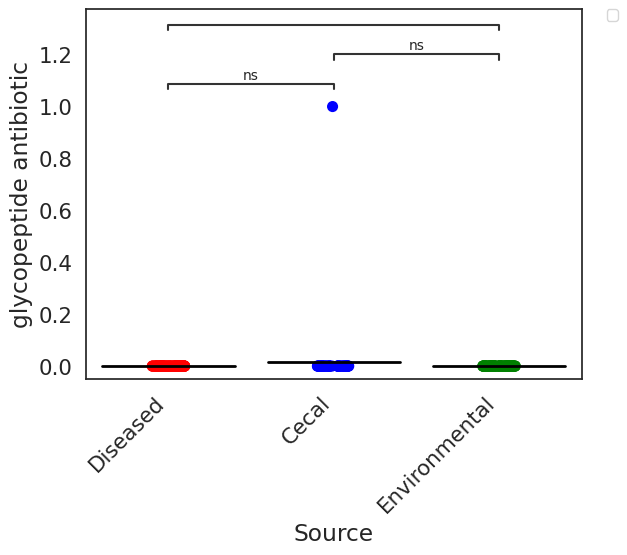

In [55]:
pairs = []

pairs2=[('Diseased', 'Cecal'), ('Diseased','Environmental'), ("Cecal","Environmental")]
states_subcat =['Diseased', 'Cecal', 'Environmental']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': cross_tab, 'x': 'Source', 'y': 'glycopeptide antibiotic', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Source", y="glycopeptide antibiotic", data=cross_tab, size=8, order=states_subcat, palette=['red','blue', 'green'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Source",
            y="glycopeptide antibiotic",
            data=cross_tab,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("05012023_EcoliARETE_glycopeptide_antibiotic_source.png", dpi = 400, bbox_inches= "tight")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Diseased vs. Cecal: t-test independent samples, P_val:2.231e-01 t=-1.223e+00
Cecal vs. Environmental: t-test independent samples, P_val:2.180e-01 t=1.237e+00
Diseased vs. Environmental: t-test independent samples, P_val:nan t=nan


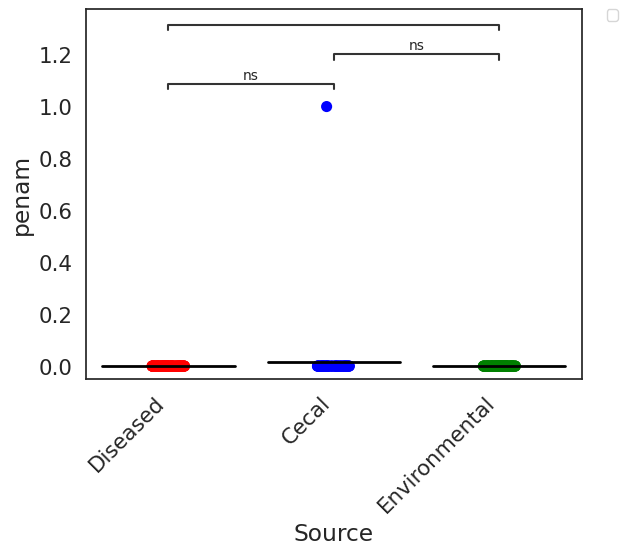

In [56]:
pairs = []

pairs2=[('Diseased', 'Cecal'), ('Diseased','Environmental'), ("Cecal","Environmental")]
states_subcat =['Diseased', 'Cecal', 'Environmental']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': cross_tab, 'x': 'Source', 'y': 'penam', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Source", y="penam", data=cross_tab, size=8, order=states_subcat, palette=['red','blue', 'green'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Source",
            y="penam",
            data=cross_tab,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("05012023_EcoliARETE_penam_source.png", dpi = 400, bbox_inches= "tight")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Diseased vs. Cecal: t-test independent samples, P_val:5.346e-01 t=6.224e-01
Cecal vs. Environmental: t-test independent samples, P_val:2.180e-01 t=1.237e+00
Diseased vs. Environmental: t-test independent samples, P_val:7.826e-02 t=1.771e+00


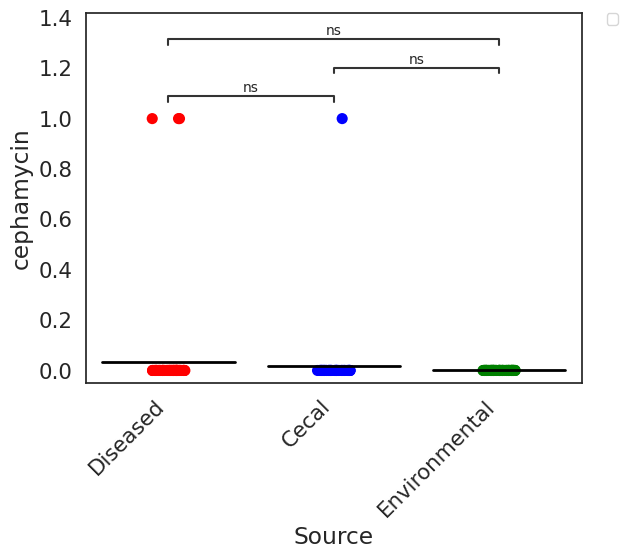

In [57]:
pairs = []

pairs2=[('Diseased', 'Cecal'), ('Diseased','Environmental'), ("Cecal","Environmental")]
states_subcat =['Diseased', 'Cecal', 'Environmental']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': cross_tab, 'x': 'Source', 'y': 'cephamycin', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Source", y="cephamycin", data=cross_tab, size=8, order=states_subcat, palette=['red','blue', 'green'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Source",
            y="cephamycin",
            data=cross_tab,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("05012023_EcoliARETE_cephamycin_source.png", dpi = 400, bbox_inches= "tight")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Diseased vs. Cecal: t-test independent samples, P_val:nan t=nan
Cecal vs. Environmental: t-test independent samples, P_val:4.198e-01 t=-8.090e-01
Diseased vs. Environmental: t-test independent samples, P_val:3.239e-01 t=-9.891e-01


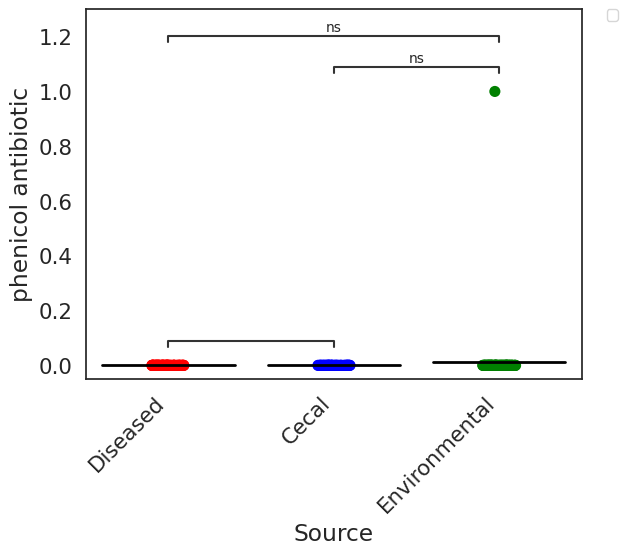

In [58]:
pairs = []

pairs2=[('Diseased', 'Cecal'), ('Diseased','Environmental'), ("Cecal","Environmental")]
states_subcat =['Diseased', 'Cecal', 'Environmental']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': cross_tab, 'x': 'Source', 'y': 'phenicol antibiotic', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Source", y="phenicol antibiotic", data=cross_tab, size=8, order=states_subcat, palette=['red','blue', 'green'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Source",
            y="phenicol antibiotic",
            data=cross_tab,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("05012023_EcoliARETE_phenicol_antibiotic_source.png", dpi = 400, bbox_inches= "tight")